# 1. **Introduction**

This case study is the ***[Capstone Project](https://www.coursera.org/learn/google-data-analytics-capstone)*** of the ***[Google Data Analytics Professional Certificate](https://www.coursera.org/professional-certificates/google-data-analytics)*** . In this case study I am working as a junior data analyst in the marketing analyst team at Cyclistic, a fictional bike-share company in Chicago. 

The company's marketing strategy has been to attract different types of customers by offering single-ride passes, full-day passes, and annual memberships. **Customers that opt for annual memberships are considered Cyclistic members and the others are considered as casual riders**.

Cyclistic's financial analysts have determined that annual members are more profitable than casual riders and that future growth depends on converting casual riders into members. 

The director of marketing assigned me the task of determining **how annual members and casual members use Cyclistic bikes differently**. This information will help inform a marketing strategy that focuses on casual riders and how they could benefit from becoming members.

To answer this business task, I will follow the data analysis process of **ask**, **prepare**, **process**, **analyze**, **share**, and **act**.

# 2. **Ask**

**Key Task**: **How do annual members and casual members use Cyclistic bikes differently?**

**Key Stakeholders**: 
- **Lily Moreno** - The director of marketing and my manager.
- **Cyclistic executive team** - Team that will decide whether to approve the recommended marketing program.

# 3. **Prepare**

- Cyclistic is a fictional company so the data provided comes from a similar but real company **Bikeshare** under this ***[license](https://www.divvybikes.com/data-license-agreement)***

- The **data** I was given comes from ***[Cyclistic’s Historical Trip Data](https://divvy-tripdata.s3.amazonaws.com/index.html)***. 

- Only data from **the first quarter of 2019 and 2020** is used.

- The data is stored in **CSV** files. There is a file for **Q1 2019** and **Q2 2020**. 

- Each file contains data from **January through March**.

- The data is **structured**

- This data is collected by **Bikeshare**, the parent company of **Divvy** in the city of Chicago. The data is taken from the bikes and provided by the company itself. This makes the data **accurate** and **trustworthy**.

Limits:

- The data does not contain financial information which could be helpful to determine if casual riders may benefit from joining the membership. 

- The data is not **consistent** as the two datasets provided have different columns where the first is more focused on the user and the second is more focused on the trip information. The data will need to be processed to compare only related fields.

# 4. **Process**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
data_2019 = pd.read_csv('Divvy_Trips_2019_Q1.csv')
data_2020 = pd.read_csv('Divvy_Trips_2020_Q1.csv')

In [2]:
# Check column names
print(data_2019.columns)
print(data_2020.columns)

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')


In [3]:
# Rename columns for consistency
data_2019 = data_2019.rename(columns={"trip_id": "ride_id",
                                      "bikeid": "rideable_type",
                                      "start_time": "started_at",
                                      "end_time": "ended_at",
                                      "from_station_id": "start_station_id",
                                      "from_station_name": "start_station_name",
                                      "to_station_id": "end_station_id",
                                      "to_station_name": "end_station_name",
                                      "usertype": "member_casual"})

# display structure of the data
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365069 entries, 0 to 365068
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             365069 non-null  int64  
 1   started_at          365069 non-null  object 
 2   ended_at            365069 non-null  object 
 3   rideable_type       365069 non-null  int64  
 4   tripduration        365069 non-null  object 
 5   start_station_id    365069 non-null  int64  
 6   start_station_name  365069 non-null  object 
 7   end_station_id      365069 non-null  int64  
 8   end_station_name    365069 non-null  object 
 9   member_casual       365069 non-null  object 
 10  gender              345358 non-null  object 
 11  birthyear           347046 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 33.4+ MB


In [4]:
# display the structure of the data
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426887 entries, 0 to 426886
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             426887 non-null  object 
 1   rideable_type       426887 non-null  object 
 2   started_at          426887 non-null  object 
 3   ended_at            426887 non-null  object 
 4   start_station_name  426887 non-null  object 
 5   start_station_id    426887 non-null  int64  
 6   end_station_name    426886 non-null  object 
 7   end_station_id      426886 non-null  float64
 8   start_lat           426887 non-null  float64
 9   start_lng           426887 non-null  float64
 10  end_lat             426886 non-null  float64
 11  end_lng             426886 non-null  float64
 12  member_casual       426887 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 42.3+ MB


Since ride_id and rideable_type are different Dtypes, they must be converted to match

In [5]:
data_2019.ride_id = data_2019.ride_id.astype(str)
data_2019.rideable_type = data_2019.rideable_type.astype(str)

In [6]:
data_2019.head()

,ride_id,started_at,ended_at,rideable_type,tripduration,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,gender,birthyear
0,21742443,2019-01-01 0:04:37,2019-01-01 0:11:07,2167,390,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 0:08:13,2019-01-01 0:15:34,4386,441,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 0:13:23,2019-01-01 0:27:12,1524,829,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 0:13:45,2019-01-01 0:43:28,252,"1,783.00",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 0:14:52,2019-01-01 0:20:56,1170,364,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0


In [7]:
data_2020.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326.0,41.9665,-87.6884,41.9671,-87.6674,member
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318.0,41.9616,-87.6660,41.9542,-87.6644,member
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117.0,41.9401,-87.6455,41.9402,-87.6530,member
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24.0,41.8846,-87.6319,41.8918,-87.6206,member
4,943BC3CBECCFD662,docked_bike,2020-01-30 8:37:16,2020-01-30 8:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212.0,41.8856,-87.6418,41.8899,-87.6343,member


Since some of the columns are different between the two sets, I will remove the incompatible columns.

In [8]:
all_trips = pd.concat([data_2019, data_2020], ignore_index=True)
all_trips.drop(columns=['rideable_type', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'birthyear', 'gender', 'tripduration'], inplace=True)
all_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791956 entries, 0 to 791955
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             791956 non-null  object 
 1   started_at          791956 non-null  object 
 2   ended_at            791956 non-null  object 
 3   start_station_id    791956 non-null  int64  
 4   start_station_name  791956 non-null  object 
 5   end_station_id      791955 non-null  float64
 6   end_station_name    791955 non-null  object 
 7   member_casual       791956 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 48.3+ MB


In [9]:
# get the duration by using the start and end time difference 
all_trips['duration'] = pd.to_datetime(all_trips.ended_at) - pd.to_datetime(all_trips.started_at)
all_trips.sort_values(by='duration')

,ride_id,started_at,ended_at,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,duration
699203,6FABADDD595AF922,2020-03-27 15:15:26,2020-03-27 15:06:14,675,HQ QR,675.0,HQ QR,casual,-1 days +23:50:48
653844,13BCB74BAFDADB21,2020-03-27 14:59:51,2020-03-27 14:58:18,675,HQ QR,675.0,HQ QR,casual,-1 days +23:58:27
715170,867C195C5650C884,2020-03-27 15:00:57,2020-03-27 14:59:38,675,HQ QR,675.0,HQ QR,casual,-1 days +23:58:41
682575,3361A4413B4813B8,2020-03-20 10:18:41,2020-03-20 10:18:18,675,HQ QR,675.0,HQ QR,casual,-1 days +23:59:37
777062,B0565BEDAF8D721F,2020-03-18 11:30:34,2020-03-18 11:30:12,675,HQ QR,675.0,HQ QR,casual,-1 days +23:59:38
...,...,...,...,...,...,...,...,...,...
246297,22039457,2019-03-12 18:48:41,2019-05-22 8:15:49,438,Central Park Ave & Ogden Ave,508.0,Central Park Ave & North Ave,Subscriber,70 days 13:27:08
525263,ABA59A8FED82A85C,2020-02-28 8:47:09,2020-05-19 20:10:34,526,Oakley Ave & Touhy Ave,453.0,Clark St & Schreiber Ave,casual,81 days 11:23:25
626364,377B59F0A27BB4CB,2020-02-02 17:18:57,2020-05-12 16:15:42,503,Drake Ave & Fullerton Ave,29.0,Noble St & Milwaukee Ave,casual,99 days 22:56:45
421464,279F7DB076FD4444,2020-01-09 21:00:22,2020-04-27 12:30:46,270,Stony Island Ave & 75th St,355.0,South Shore Dr & 67th St,casual,108 days 15:30:24


In [10]:
# From examining the data, we can see that there are some negative values in the duration column. 
all_trips[all_trips.duration < "0"].count()

ride_id               117
started_at            117
ended_at              117
start_station_id      117
start_station_name    117
end_station_id        116
end_station_name      116
member_casual         117
duration              117
dtype: int64

In [11]:
# There are some trips with a duration of less than 1 minute which seems unlikely.
all_trips[all_trips.duration < "1 minute"].count()

ride_id               7671
started_at            7671
ended_at              7671
start_station_id      7671
start_station_name    7671
end_station_id        7670
end_station_name      7670
member_casual         7671
duration              7671
dtype: int64

In [12]:
# There are some trips with a duration of more than a day which seems unlikely.
all_trips[all_trips.duration > "1 days"].count()

ride_id               482
started_at            482
ended_at              482
start_station_id      482
start_station_name    482
end_station_id        482
end_station_name      482
member_casual         482
duration              482
dtype: int64

In [13]:
# Removing the values with a duration of less than 1 minute and values more than a day.
all_trips = all_trips[all_trips.duration >= "1 minute"]
all_trips = all_trips[all_trips.duration <= "1 days"]
all_trips = all_trips.reset_index()
all_trips = all_trips.drop(columns=['index'])

In [14]:
# The two datasets have different values for the member_casual column. We will standardize the values to 'member' and 'casual'.
all_trips.loc[all_trips['member_casual'] == 'Subscriber', 'member_casual'] = 'member'
all_trips.loc[all_trips['member_casual'] == 'Customer', 'member_casual'] = 'casual'

In [15]:
all_trips.shape

(783803, 9)

In [16]:
# Check for missing values
all_trips.isna().sum()

ride_id               0
started_at            0
ended_at              0
start_station_id      0
start_station_name    0
end_station_id        0
end_station_name      0
member_casual         0
duration              0
dtype: int64

In [17]:
# Removing leading and trailing whitespaces in column "Ride Id".
all_trips['ride_id'] = all_trips['ride_id'].str.strip()

# View any duplicate rows.
all_trips[all_trips['ride_id'].duplicated()]

,ride_id,started_at,ended_at,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,duration


In [18]:
# Add a column for the trip duration in minutes.
all_trips['duration'] = (all_trips['duration'].dt.total_seconds()/60).astype(int)
all_trips

,ride_id,started_at,ended_at,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,duration
0,21742443,2019-01-01 0:04:37,2019-01-01 0:11:07,199,Wabash Ave & Grand Ave,84.0,Milwaukee Ave & Grand Ave,member,6
1,21742444,2019-01-01 0:08:13,2019-01-01 0:15:34,44,State St & Randolph St,624.0,Dearborn St & Van Buren St (*),member,7
2,21742445,2019-01-01 0:13:23,2019-01-01 0:27:12,15,Racine Ave & 18th St,644.0,Western Ave & Fillmore St (*),member,13
3,21742446,2019-01-01 0:13:45,2019-01-01 0:43:28,123,California Ave & Milwaukee Ave,176.0,Clark St & Elm St,member,29
4,21742447,2019-01-01 0:14:52,2019-01-01 0:20:56,173,Mies van der Rohe Way & Chicago Ave,35.0,Streeter Dr & Grand Ave,member,6
...,...,...,...,...,...,...,...,...,...
783798,005D3BC2A3B33DDA,2020-03-12 7:32:25,2020-03-12 7:38:44,91,Clinton St & Washington Blvd,47.0,State St & Kinzie St,member,6
783799,82B10FA3994BC66A,2020-03-07 15:25:55,2020-03-07 16:14:03,161,Rush St & Superior St,240.0,Sheridan Rd & Irving Park Rd,member,48
783800,AA0D5AAA0B59C8AA,2020-03-01 13:12:38,2020-03-01 13:38:29,141,Clark St & Lincoln Ave,210.0,Ashland Ave & Division St,casual,25
783801,3296360A7BC20FB8,2020-03-07 18:02:45,2020-03-07 18:13:18,672,Franklin St & Illinois St,264.0,Stetson Ave & South Water St,member,10


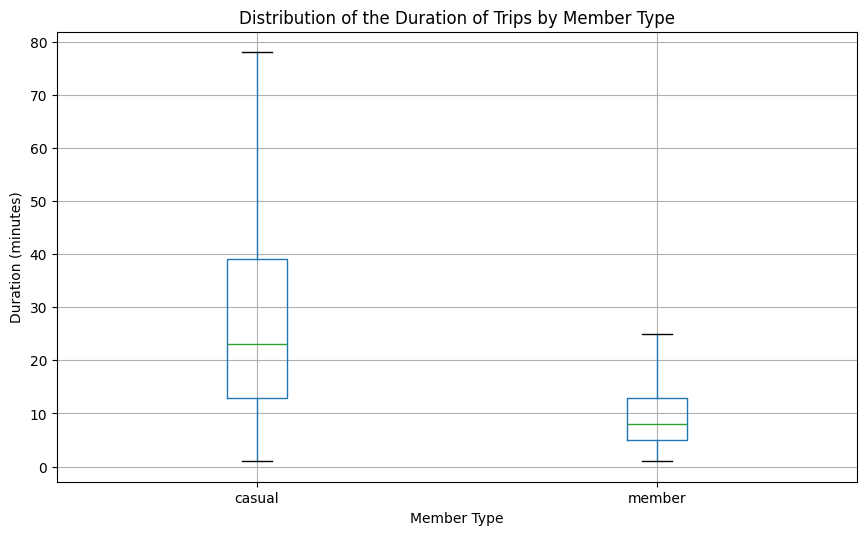

In [19]:
# Examine the duration column based on the member type to see if there are differences.
fig1 = all_trips.boxplot(column='duration', by='member_casual', showfliers=False, figsize=(10, 6))
fig1.set_title('Distribution of the Duration of Trips by Member Type')
fig1.set_ylabel('Duration (minutes)')
fig1.set_xlabel('Member Type')
plt.suptitle('')
plt.show()

It appears that **casual users tend to have longer rides**.

In [20]:
# Breaking down the start time into year, month, day, and hour.
all_trips['year'] = pd.DatetimeIndex(all_trips['started_at']).year
all_trips['month'] = pd.DatetimeIndex(all_trips['started_at']).month_name()
all_trips['day'] = pd.DatetimeIndex(all_trips['started_at']).day_name()
all_trips['hour'] = pd.DatetimeIndex(all_trips['started_at']).hour

all_trips

,ride_id,started_at,ended_at,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,duration,year,month,day,hour
0,21742443,2019-01-01 0:04:37,2019-01-01 0:11:07,199,Wabash Ave & Grand Ave,84.0,Milwaukee Ave & Grand Ave,member,6,2019,January,Tuesday,0
1,21742444,2019-01-01 0:08:13,2019-01-01 0:15:34,44,State St & Randolph St,624.0,Dearborn St & Van Buren St (*),member,7,2019,January,Tuesday,0
2,21742445,2019-01-01 0:13:23,2019-01-01 0:27:12,15,Racine Ave & 18th St,644.0,Western Ave & Fillmore St (*),member,13,2019,January,Tuesday,0
3,21742446,2019-01-01 0:13:45,2019-01-01 0:43:28,123,California Ave & Milwaukee Ave,176.0,Clark St & Elm St,member,29,2019,January,Tuesday,0
4,21742447,2019-01-01 0:14:52,2019-01-01 0:20:56,173,Mies van der Rohe Way & Chicago Ave,35.0,Streeter Dr & Grand Ave,member,6,2019,January,Tuesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783798,005D3BC2A3B33DDA,2020-03-12 7:32:25,2020-03-12 7:38:44,91,Clinton St & Washington Blvd,47.0,State St & Kinzie St,member,6,2020,March,Thursday,7
783799,82B10FA3994BC66A,2020-03-07 15:25:55,2020-03-07 16:14:03,161,Rush St & Superior St,240.0,Sheridan Rd & Irving Park Rd,member,48,2020,March,Saturday,15
783800,AA0D5AAA0B59C8AA,2020-03-01 13:12:38,2020-03-01 13:38:29,141,Clark St & Lincoln Ave,210.0,Ashland Ave & Division St,casual,25,2020,March,Sunday,13
783801,3296360A7BC20FB8,2020-03-07 18:02:45,2020-03-07 18:13:18,672,Franklin St & Illinois St,264.0,Stetson Ave & South Water St,member,10,2020,March,Saturday,18


# 5. **Analyze and Share**

# 5.1 **Total Rides by Member Type**

In [21]:
pd.pivot_table(all_trips,
              index = 'member_casual',
              values = 'ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'Total Count')

,count
,ride_id
member_casual,
casual,67397
member,716406
Total Count,783803


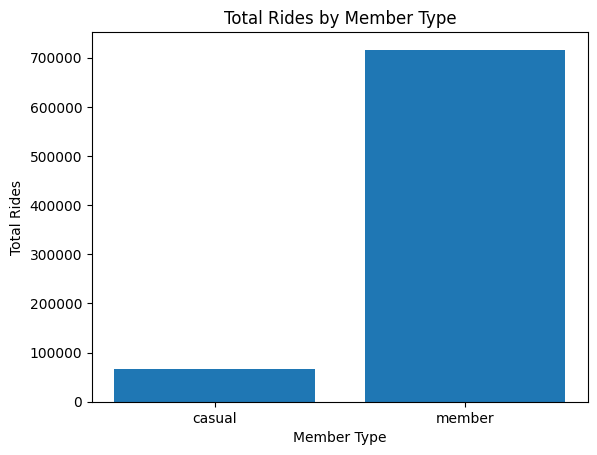

In [22]:
fig_1 = all_trips.groupby('member_casual', as_index=False).count()

plt.bar(fig_1['member_casual'], fig_1['ride_id'])
plt.xlabel('Member Type')
plt.ylabel('Total Rides')
plt.title('Total Rides by Member Type')
plt.show()

The vast majority of rides are by members.

# 5.2 **Number of Rides by Month**

In [23]:
df_pv1 = pd.pivot_table(all_trips,
              index = ['year', 'month', 'member_casual'],
              values = 'ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'Total Count')
df_pv1 = df_pv1.loc[(df_pv1 != 0).any(axis=1)]
df_pv1

count
                                   ride_id
year        month    member_casual        
2019        February casual           2627
                     member          93522
            January  casual           4591
                     member          98601
            March    casual          15877
                     member         149659
2020        February casual          12206
                     member         125393
            January  casual           7678
                     member         134875
            March    casual          24418
                     member         114356
Total Count                         783803

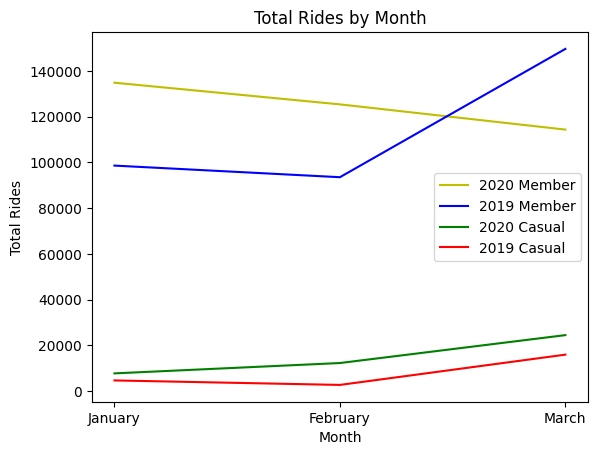

In [24]:
fig_2 = all_trips.groupby(['year', 'month', 'member_casual'], as_index=False).count()
m = ["January", "February", "March"]
fig_2['month'] = pd.Categorical(fig_2['month'], categories=m, ordered=True)
fig_2 = fig_2.sort_values('month')
fig_2 = fig_2[fig_2['ride_id'] != 0]
fig_3 = fig_2[fig_2.year == 2019]
fig_4 = fig_3[fig_3.member_casual == 'casual']
fig_5 = fig_3[fig_3.member_casual == 'member']
fig_6 = fig_2[fig_2.year == 2020]
fig_7 = fig_6[fig_6.member_casual == 'casual']
fig_8 = fig_6[fig_6.member_casual == 'member']

plt.plot(fig_8['month'], fig_8['ride_id'], label='2020 Member', c='y')
plt.plot(fig_5['month'], fig_5['ride_id'], label='2019 Member', c='b')
plt.plot(fig_7['month'], fig_7['ride_id'], label='2020 Casual', c='g')
plt.plot(fig_4['month'], fig_4['ride_id'], label='2019 Casual', c='r')
plt.xlabel('Month')
plt.ylabel('Total Rides')
plt.title('Total Rides by Month')
plt.legend()
plt.show()



# 5.3 **Number of Rides by Day of the Week**

In [25]:
pd.pivot_table(all_trips,
              index = ['day', 'member_casual'],
              values = 'ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'Total Count')

count
                          ride_id
day         member_casual        
Friday      casual           7954
            member         114588
Monday      casual           5558
            member         109855
Saturday    casual          13399
            member          59033
Sunday      casual          18512
            member          59697
Thursday    casual           7085
            member         124568
Tuesday     casual           7266
            member         127363
Wednesday   casual           7623
            member         121302
Total Count                783803

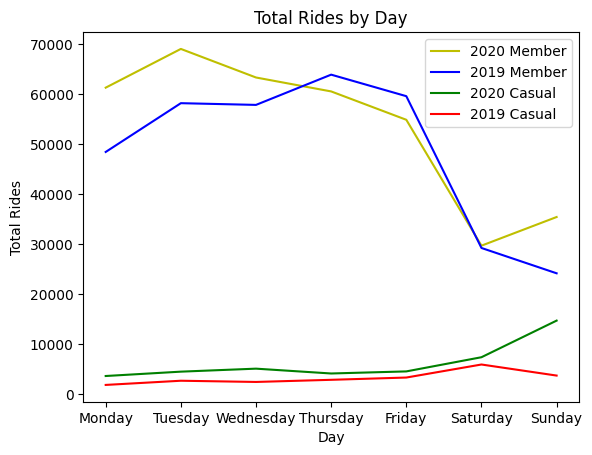

In [26]:
fig_days = all_trips.groupby(['year', 'day', 'member_casual'], as_index=False).count()
fig_days = fig_days[fig_days['ride_id'] != 0]
m = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
fig_days['day'] = pd.Categorical(fig_days['day'], categories=m, ordered=True)
fig_days = fig_days.sort_values('day')
fig_3 = fig_days[fig_days.year == 2019]
fig_4 = fig_3[fig_3.member_casual == 'casual']
fig_5 = fig_3[fig_3.member_casual == 'member']
fig_6 = fig_days[fig_days.year == 2020]
fig_7 = fig_6[fig_6.member_casual == 'casual']
fig_8 = fig_6[fig_6.member_casual == 'member']

plt.plot(fig_8['day'], fig_8['ride_id'], label='2020 Member', c='y')
plt.plot(fig_5['day'], fig_5['ride_id'], label='2019 Member', c='b')
plt.plot(fig_7['day'], fig_7['ride_id'], label='2020 Casual', c='g')
plt.plot(fig_4['day'], fig_4['ride_id'], label='2019 Casual', c='r')
plt.xlabel('Day')
plt.ylabel('Total Rides')
plt.title('Total Rides by Day')
plt.legend()
plt.show()

- It appears that the number of member rides drastically **fall during the weekend**.
- Casual riders see a slight **rise during the weekend**.

# 5.4 **Number of Rides by Hour of the Day**

In [27]:
pd.pivot_table(all_trips,
              index = ['hour', 'member_casual'],
              values = 'ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'Total Count')

count
                          ride_id
hour        member_casual        
0           casual            460
            member           2937
1           casual            328
            member           1725
2           casual            240
            member           1125
3           casual            143
            member            890
4           casual             91
            member           1981
5           casual            194
            member           9008
6           casual            471
            member          27617
7           casual           1008
            member          58355
8           casual           1826
            member          78343
9           casual           1860
            member          35795
10          casual           2770
            member          24117
11          casual           4225
            member          29126
12          casual           5599
            member          33333
13          casual           7129
            member          32839
14          casual           7659
            member          31995
15          casual           7772
            member          42741
16          casual           7585
            member          75912
17          casual           6947
            member          95359
18          casual           4239
            member          55251
19          casual           2457
            member          32379
20          casual           1526
            member          19119
21          casual           1293
            member          13552
22          casual            932
            member           8246
23          casual            643
            member           4661
Total Count                783803

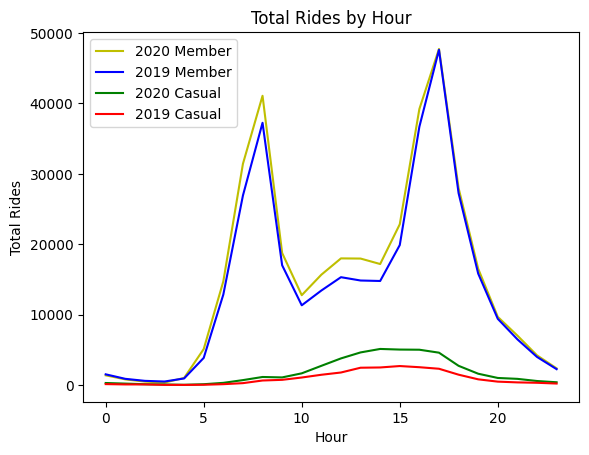

In [34]:
fig_hours = all_trips.groupby(['year', 'hour', 'member_casual'], as_index=False).count()
fig_hours = fig_hours[fig_hours['ride_id'] != 0]
fig_3 = fig_hours[fig_hours.year == 2019]
fig_4 = fig_3[fig_3.member_casual == 'casual']
fig_5 = fig_3[fig_3.member_casual == 'member']
fig_6 = fig_hours[fig_hours.year == 2020]
fig_7 = fig_6[fig_6.member_casual == 'casual']
fig_8 = fig_6[fig_6.member_casual == 'member']

plt.plot(fig_8['hour'], fig_8['ride_id'], label='2020 Member', c='y')
plt.plot(fig_5['hour'], fig_5['ride_id'], label='2019 Member', c='b')
plt.plot(fig_7['hour'], fig_7['ride_id'], label='2020 Casual', c='g')
plt.plot(fig_4['hour'], fig_4['ride_id'], label='2019 Casual', c='r')
plt.xlabel('Hour')
plt.ylabel('Total Rides')
plt.title('Total Rides by Hour')
plt.legend()
plt.show()

- It seems as if Members are taking most rides around the traditional work hours of 9 and 5.
- It is possible that Members might be using the service to ride to and from work.
- There is also an upward trend in casual rides in the afternoon hours.

# 5.5 **Average Ride Duration by Member Type**

In [35]:
pd.pivot_table(all_trips,
               index = 'member_casual',
               values = ['duration'],
               aggfunc = ['mean'],
               margins = True,
               margins_name = 'Total Ride Duration Average')

,mean
,duration
member_casual,
casual,37.992730
member,10.976064
Total Ride Duration Average,13.299150


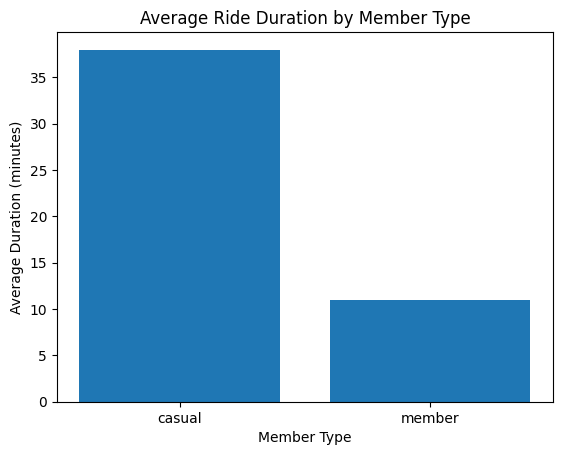

In [36]:
fig_4 = all_trips.groupby('member_casual', as_index=False) ['duration'].mean()
plt.bar(fig_4['member_casual'], fig_4['duration'])
plt.xlabel('Member Type')
plt.ylabel('Average Duration (minutes)')
plt.title('Average Ride Duration by Member Type')
plt.show()

- **Casual riders on average have longer ride durations. More than double that of members**.

# 5.6 **Average Ride Duration by Month**

In [43]:
pd.pivot_table(all_trips,
               index = ['month', 'member_casual'],
               values = ['duration'],
               aggfunc = ['mean'],
               margins = True,
               margins_name = 'Total Ride Duration Average')

mean
                                            duration
month                       member_casual           
February                    casual         37.122969
                            member         10.658858
January                     casual         35.803733
                            member         10.624488
March                       casual         38.979402
                            member         11.549991
Total Ride Duration Average                13.299150

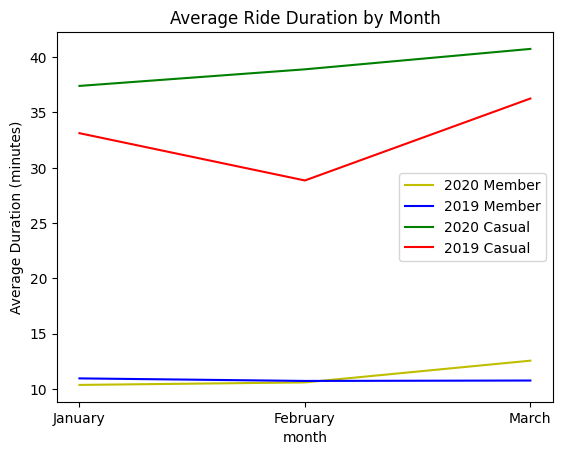

In [44]:
fig_months = all_trips.groupby(['year', 'month', 'member_casual'], as_index=False) ['duration'].mean()
m = ["January", "February", "March"]
fig_months['month'] = pd.Categorical(fig_months['month'], categories=m, ordered=True)
fig_months = fig_months.sort_values('month')
fig_3 = fig_months[fig_months.year == 2019]
fig_4 = fig_3[fig_3.member_casual == 'casual']
fig_5 = fig_3[fig_3.member_casual == 'member']
fig_6 = fig_months[fig_months.year == 2020]
fig_7 = fig_6[fig_6.member_casual == 'casual']
fig_8 = fig_6[fig_6.member_casual == 'member']

plt.plot(fig_8['month'], fig_8['duration'], label='2020 Member', c='y')
plt.plot(fig_5['month'], fig_5['duration'], label='2019 Member', c='b')
plt.plot(fig_7['month'], fig_7['duration'], label='2020 Casual', c='g')
plt.plot(fig_4['month'], fig_4['duration'], label='2019 Casual', c='r')
plt.xlabel('month')
plt.ylabel('Average Duration (minutes)')
plt.title('Average Ride Duration by Month')
plt.legend()
plt.show()

# 5.7 **Average Ride Duration by Day of the Week**

In [45]:
pd.pivot_table(all_trips,
               index = ['day', 'member_casual'],
               values = ['duration'],
               aggfunc = ['mean'],
               margins = True,
               margins_name = 'Total Ride Duration Average')

mean
                                            duration
day                         member_casual           
Friday                      casual         36.711969
                            member         10.662792
Monday                      casual         34.002879
                            member         10.668782
Saturday                    casual         38.503097
                            member         12.016736
Sunday                      casual         40.511938
                            member         12.529373
Thursday                    casual         34.879746
                            member         10.631358
Tuesday                     casual         35.180842
                            member         10.883875
Wednesday                   casual         40.796799
                            member         10.730169
Total Ride Duration Average                13.299150

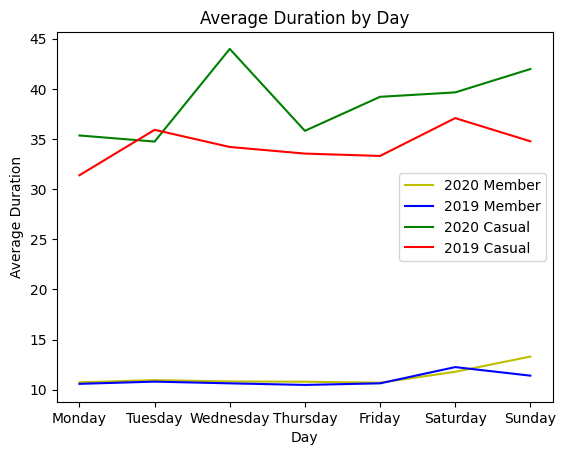

In [47]:
fig_days = all_trips.groupby(['year', 'day', 'member_casual'], as_index=False) ['duration'].mean()
m = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
fig_days['day'] = pd.Categorical(fig_days['day'], categories=m, ordered=True)
fig_days = fig_days.sort_values('day')
fig_3 = fig_days[fig_days.year == 2019]
fig_4 = fig_3[fig_3.member_casual == 'casual']
fig_5 = fig_3[fig_3.member_casual == 'member']
fig_6 = fig_days[fig_days.year == 2020]
fig_7 = fig_6[fig_6.member_casual == 'casual']
fig_8 = fig_6[fig_6.member_casual == 'member']

plt.plot(fig_8['day'], fig_8['duration'], label='2020 Member', c='y')
plt.plot(fig_5['day'], fig_5['duration'], label='2019 Member', c='b')
plt.plot(fig_7['day'], fig_7['duration'], label='2020 Casual', c='g')
plt.plot(fig_4['day'], fig_4['duration'], label='2019 Casual', c='r')
plt.xlabel('Day')
plt.ylabel('Average Duration')
plt.title('Average Duration by Day')
plt.legend()
plt.show()

# 5.8 **Average Ride Duration by Hour of the Day**

In [48]:
pd.pivot_table(all_trips,
               index = ['hour', 'member_casual'],
               values = ['duration'],
               aggfunc = ['mean'],
               margins = True,
               margins_name = 'Total Ride Duration Average')

mean
                                            duration
hour                        member_casual           
0                           casual         31.606522
                            member         11.301668
1                           casual         34.198171
                            member         11.262609
2                           casual         32.283333
                            member         12.058667
3                           casual         48.405594
                            member         12.521348
4                           casual         22.098901
                            member          8.423019
5                           casual         30.087629
                            member          9.200488
6                           casual         20.995754
                            member          9.686280
7                           casual         17.417659
                            member         10.177688
8                           casual         22.819825
                            member         10.667258
9                           casual         34.301075
                            member         10.146696
10                          casual         44.995668
                            member         10.600655
11                          casual         45.388876
                            member         10.768832
12                          casual         41.327558
                            member         10.722197
13                          casual         40.784542
                            member         11.026249
14                          casual         39.462985
                            member         12.038225
15                          casual         39.368245
                            member         11.488524
16                          casual         35.971786
                            member         11.444910
17                          casual         37.775443
                            member         11.778678
18                          casual         37.057561
                            member         11.306456
19                          casual         37.326007
                            member         10.750486
20                          casual         36.235911
                            member         10.879910
21                          casual         34.041763
                            member         11.401860
22                          casual         32.654506
                            member         10.171356
23                          casual         29.273717
                            member         10.705643
Total Ride Duration Average                13.299150

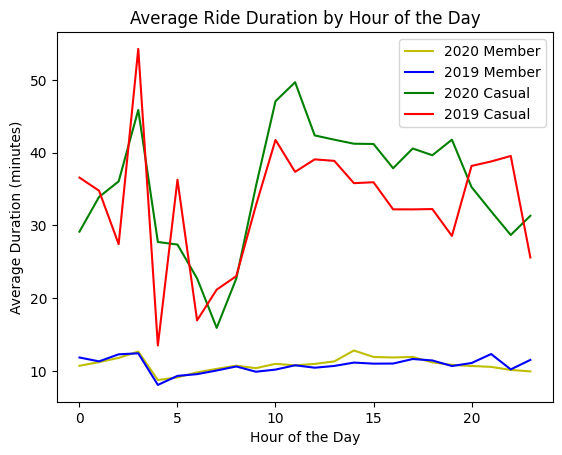

In [49]:
fig_hours = all_trips.groupby(['year', 'hour', 'member_casual'], as_index=False) ['duration'].mean()
fig_3 = fig_hours[fig_hours.year == 2019]
fig_4 = fig_3[fig_3.member_casual == 'casual']
fig_5 = fig_3[fig_3.member_casual == 'member']
fig_6 = fig_hours[fig_hours.year == 2020]
fig_7 = fig_6[fig_6.member_casual == 'casual']
fig_8 = fig_6[fig_6.member_casual == 'member']

plt.plot(fig_8['hour'], fig_8['duration'], label='2020 Member', c='y')
plt.plot(fig_5['hour'], fig_5['duration'], label='2019 Member', c='b')
plt.plot(fig_7['hour'], fig_7['duration'], label='2020 Casual', c='g')
plt.plot(fig_4['hour'], fig_4['duration'], label='2019 Casual', c='r')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Duration (minutes)')
plt.title('Average Ride Duration by Hour of the Day')
plt.legend()
plt.show()

# 6.  **Act**

# 6.1  **Conclusions**

- Members and Casual riders do use the service **differently**.
- Casual riders tend to ride **more than twice as long** as Members as shown by the **average ride length**.
- Members use the service mostly during **weekdays** and number of rides rises around **9** and **5**. I believe this indicates that Members are most likely **commuting to and from work** with this service.
- Casual riders have more rides in the **afternoon** and **weekends**. This indicates Casual riders may use the service more for **leisure** rather than commuting to work.

# 6.2  **Additional Data to Consider**

- The financial information would be nice to have as it would show if Casual riders would benefit from signing up for the membership instead of buying single ride or day passes.

# 6.3  **Recommendations**

- An **Annual Membership for Weekend rides only**.
- Since Casual riders tend to ride longer, consider changing pricing based on ride duration rather than a single ride or day pass.
- Marketing that focuses on the savings Casual weekday riders might have from purchasing a membership rather than buying multiple day or ride passes.